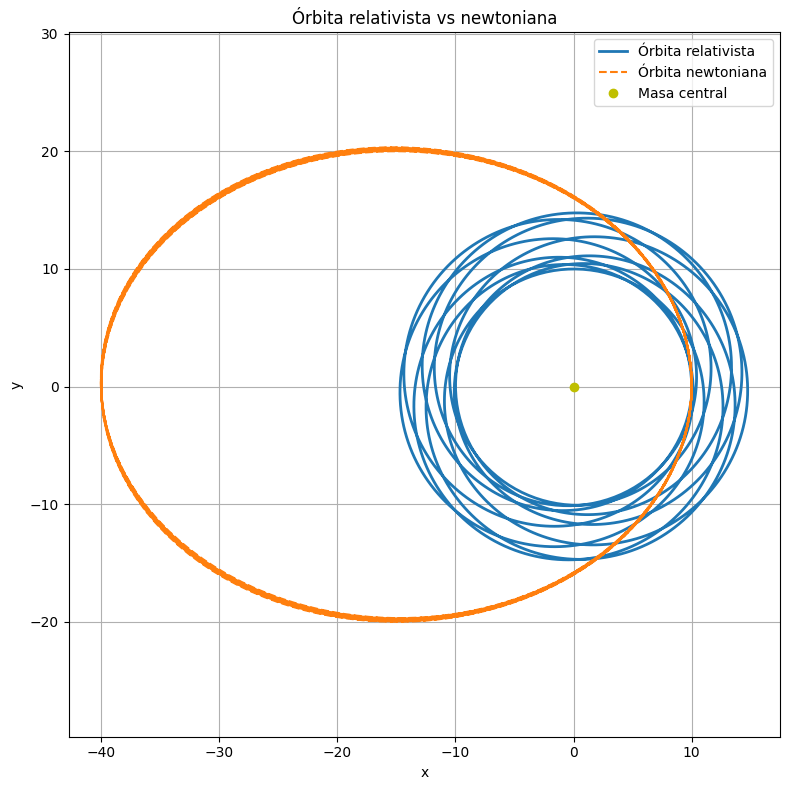

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes físicas (en unidades naturales donde G = c = 1)
GM = 1.0   # Constante gravitacional por masa
Lz = 4.0   # Momento angular por unidad de masa (ajustable)

# Ecuación relativista: u'' + u = GM/Lz^2 + 3GM * u^2
def relativistic_orbit(phi, y):
    u, up = y
    upp = GM / Lz**2 + 3 * GM * u**2 - u
    return [up, upp]

# Ecuación newtoniana: u'' + u = GM/Lz^2
def newtonian_orbit(phi, y):
    u, up = y
    upp = GM / Lz**2 - u
    return [up, upp]

# Condiciones iniciales
u0 = 1 / 10.0  # r0 = 10
up0 = 0.0      # sin velocidad radial inicial

# Intervalo de integración
phi_span = (0, 20 * np.pi)
phi_eval = np.linspace(*phi_span, 2000)

# Resolver ecuaciones diferenciales
rel_sol = solve_ivp(relativistic_orbit, phi_span, [u0, up0], t_eval=phi_eval)
newt_sol = solve_ivp(newtonian_orbit, phi_span, [u0, up0], t_eval=phi_eval)

# Convertir a coordenadas cartesianas
r_rel = 1 / rel_sol.y[0]
r_newt = 1 / newt_sol.y[0]
phi = rel_sol.t

x_rel = r_rel * np.cos(phi)
y_rel = r_rel * np.sin(phi)

x_newt = r_newt * np.cos(phi)
y_newt = r_newt * np.sin(phi)

# Graficar las órbitas
plt.figure(figsize=(8, 8))
plt.plot(x_rel, y_rel, label='Órbita relativista', linewidth=2)
plt.plot(x_newt, y_newt, label='Órbita newtoniana', linestyle='--')
plt.plot(0, 0, 'yo', label='Masa central')
plt.title('Órbita relativista vs newtoniana')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


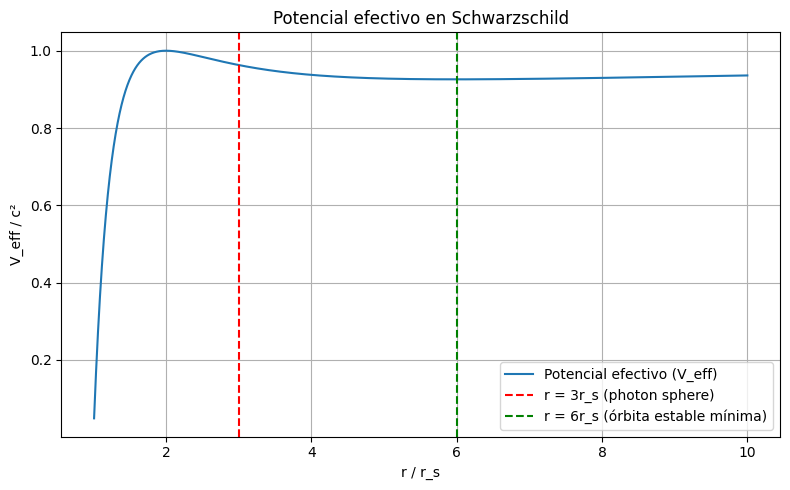

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
G = 6.67430e-11       # m^3 kg^-1 s^-2
c = 299792458         # m/s
M = 5.972e24          # Masa (por ejemplo, la Tierra) en kg
r_s = 2 * G * M / c**2  # Radio de Schwarzschild

# Momento angular específico (ajustable)
L = 4 * G * M / c     # Ajusta para ver cambios en el potencial

# Rango de radios (evitar r <= r_s)
r = np.linspace(1.01 * r_s, 10 * r_s, 1000)

# Potencial efectivo
V_eff = (1 - r_s / r) * (c**2 + L**2 / r**2)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(r / r_s, V_eff / c**2, label='Potencial efectivo (V_eff)')
plt.axvline(x=3, color='red', linestyle='--', label='r = 3r_s (photon sphere)')
plt.axvline(x=6, color='green', linestyle='--', label='r = 6r_s (órbita estable mínima)')
plt.xlabel('r / r_s')
plt.ylabel('V_eff / c²')
plt.title('Potencial efectivo en Schwarzschild')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


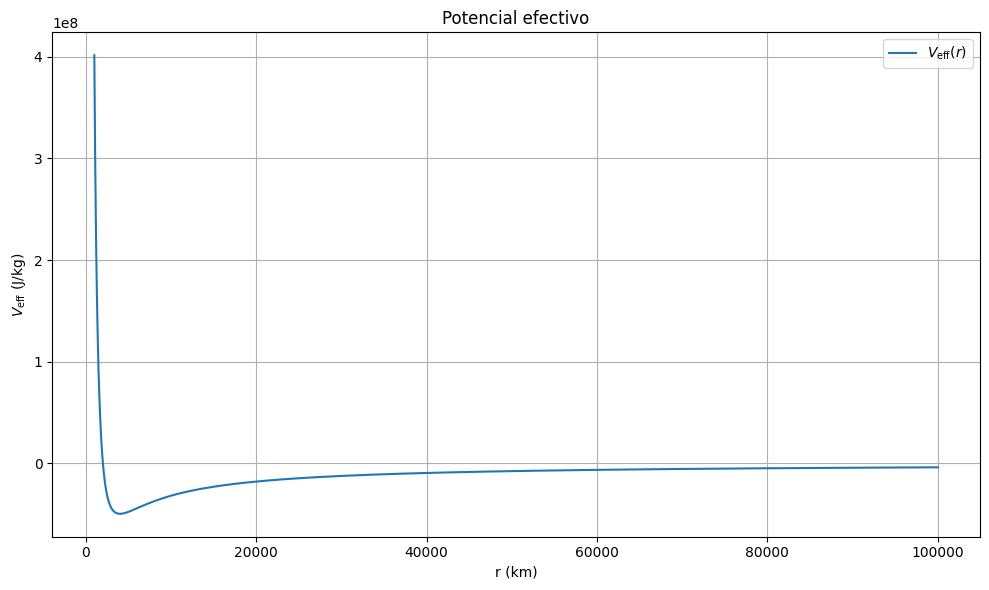

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas (puedes usar unidades naturales si prefieres)
G = 6.67430e-11     # Constante gravitacional, m^3 kg^-1 s^-2
c = 3.0e8           # Velocidad de la luz, m/s
M = 5.972e24        # Masa del objeto central, por ejemplo, la Tierra (en kg)
L = 4.0e10          # Momento angular (ajustable)

# Dominio radial
r = np.linspace(1e6, 1e8, 1000)  # desde 1000 km hasta 100000 km

# Potencial efectivo relativista
V_eff = - G*M / r + L**2 / (2 * r**2) - (G * M * L**2) / (c**2 * r**3)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(r / 1e3, V_eff, label=r'$V_{\mathrm{eff}}(r)$')
plt.xlabel('r (km)')
plt.ylabel(r'$V_{\mathrm{eff}}$ (J/kg)')
plt.title('Potencial efectivo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


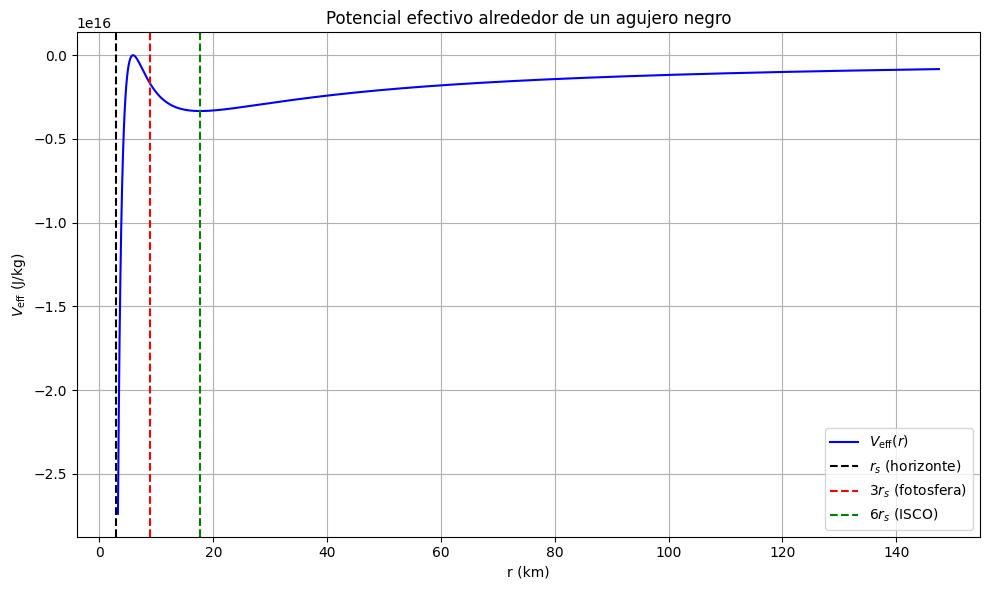

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
G = 6.67430e-11     # Constante gravitacional, m^3 kg^-1 s^-2
c = 3.0e8           # Velocidad de la luz, m/s
M = 1.989e30        # Masa de un agujero negro (1 masa solar), en kg
L = 4 * G * M / c  # Un valor razonable para ver estructura del potencial

# Radios característicos
r_s = 2 * G * M / c**2       # Radio de Schwarzschild
r_photon = 3 * r_s           # Fotosfera
r_isco = 6 * r_s             # Órbita circular estable más interna

# Dominio radial (cubrimos desde un poco más de r_s hasta 50 r_s)
r = np.linspace(1.1 * r_s, 50 * r_s, 1000)  # evitar r = r_s para evitar divisiones por cero

# Potencial efectivo relativista para partículas masivas
V_eff = - G*M / r + L**2 / (2 * r**2) - (G * M * L**2) / (c**2 * r**3)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(r / 1e3, V_eff, label=r'$V_{\mathrm{eff}}(r)$', color='blue')  # convertir r a km

# Líneas verticales en radios característicos
plt.axvline(r_s / 1e3, color='black', linestyle='--', label=r'$r_s$ (horizonte)')
plt.axvline(r_photon / 1e3, color='red', linestyle='--', label=r'$3r_s$ (fotosfera)')
plt.axvline(r_isco / 1e3, color='green', linestyle='--', label=r'$6r_s$ (ISCO)')

# Etiquetas y estilo
plt.xlabel('r (km)')
plt.ylabel(r'$V_{\mathrm{eff}}$ (J/kg)')
plt.title('Potencial efectivo alrededor de un agujero negro')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
